Chapter 1

In [4]:
import reservoirpy as rpy 
import numpy as np
import matplotlib.pyplot as plt


rpy.verbosity(0)
rpy.set_seed(42)

In [5]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

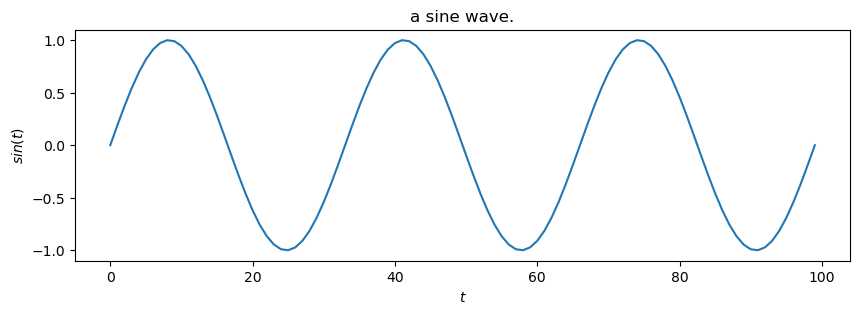

In [10]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("a sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [13]:
states = reservoir.run(X)

In [16]:
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN
readout = Ridge(ridge=1e-7)

<function matplotlib.pyplot.show(close=None, block=None)>

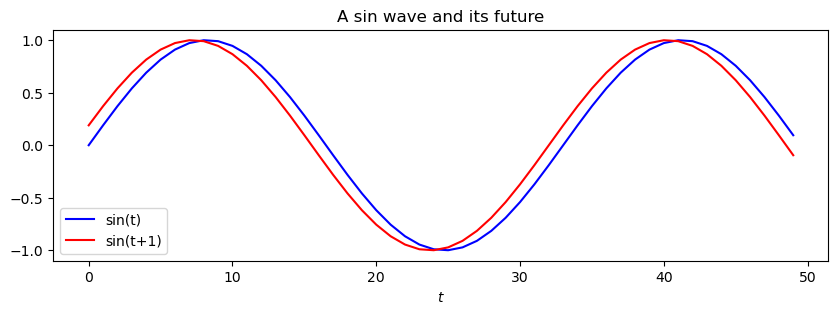

In [31]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sin wave and its future")
plt.xlabel("$t$")
plt.plot(X_train, label = "sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show

In [38]:
train_state = reservoir.run(X_train, reset=True)

In [39]:
readout = readout.fit(train_state, Y_train, warmup=10)

<function matplotlib.pyplot.show(close=None, block=None)>

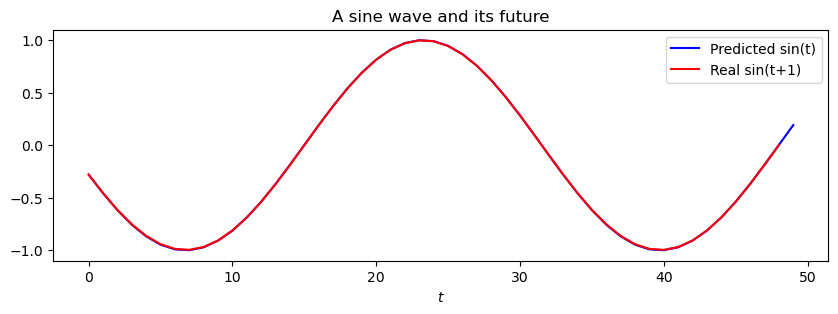

In [40]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

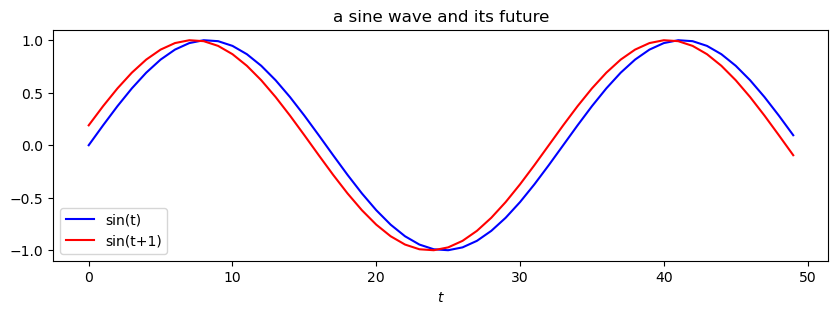

In [78]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("a sine wave and its future")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show

In [79]:
train_states = reservoir.run(X_train, reset=True)

In [80]:
readout = readout.fit(train_states, Y_train, warmup=10)

<function matplotlib.pyplot.show(close=None, block=None)>

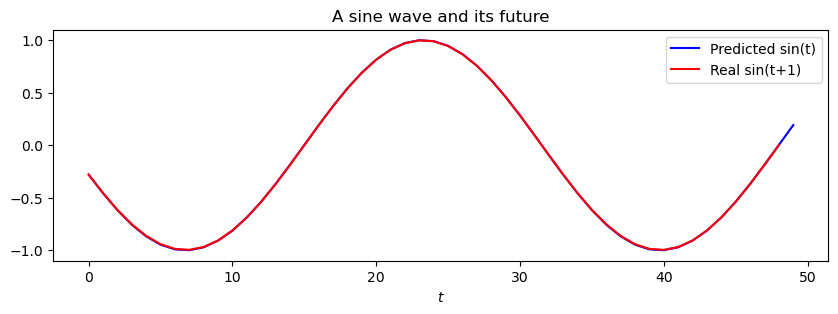

In [81]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show

In [89]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

In [90]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

In [91]:
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


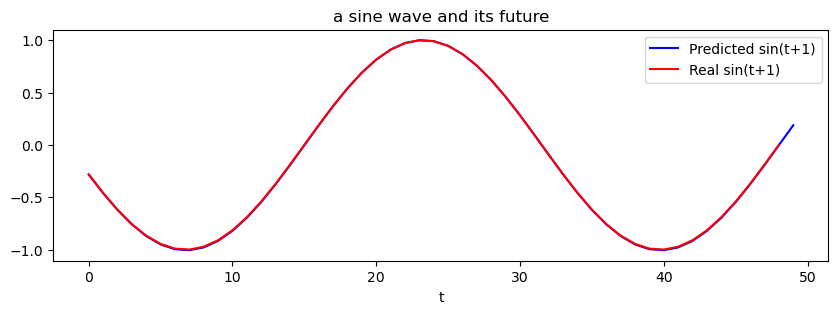

In [92]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("a sine wave and its future")
plt.xlabel("t")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

Chapter 3